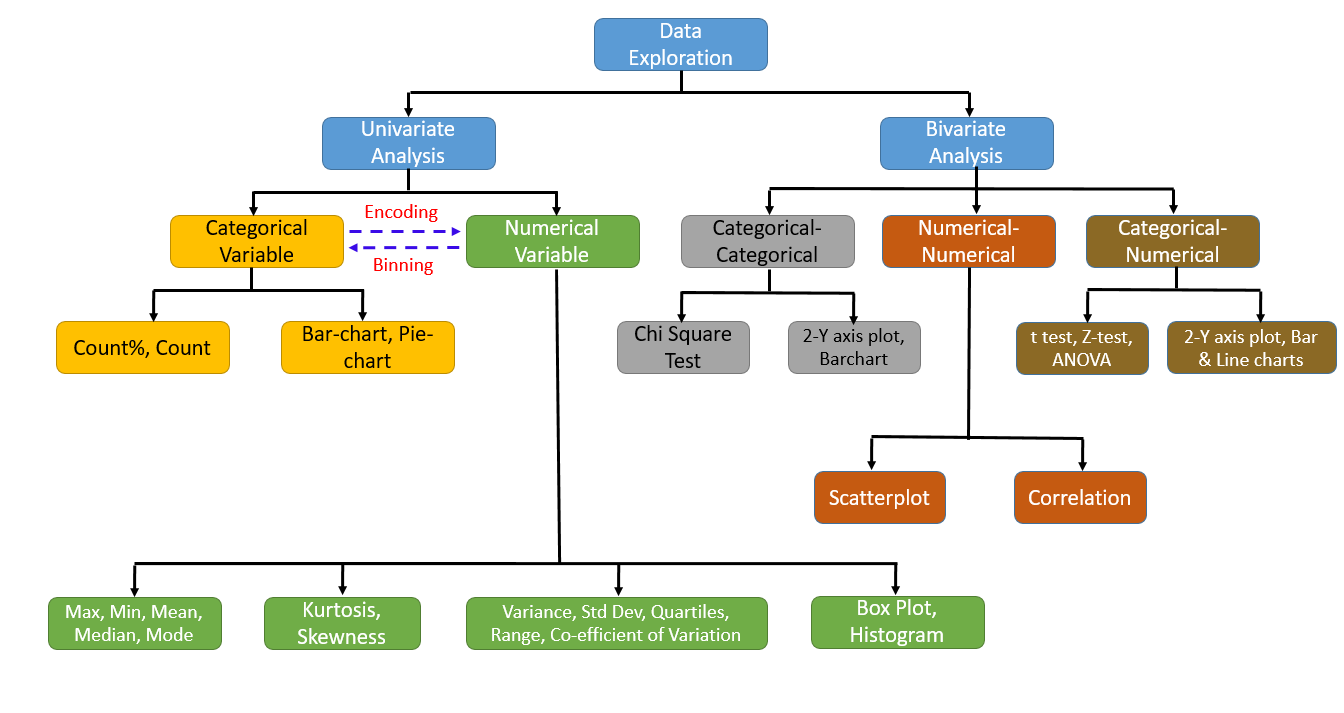

In [2]:
from IPython.display import Image
Image(filename="download.png")
#image Refference:nitinkaushik01

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Univariate Analysis

# Categorical Variables

In [4]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.groupby(['Species']).count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


In [6]:

freq_table = df.groupby(['Species']).size().reset_index(name='Count').rename(columns={'Sepcies':'Species'})
freq_table

,Species,Count
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


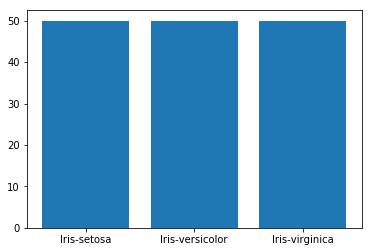

In [7]:

plt.bar(freq_table['Species'], freq_table['Count'])
plt.show()

In [8]:
freq_table['Count%'] = freq_table['Count']/sum(freq_table['Count'])*100
freq_table

,Species,Count,Count%
0,Iris-setosa,50,33.333333
1,Iris-versicolor,50,33.333333
2,Iris-virginica,50,33.333333


# Univariate Analysis


# Numerical  Variables 

In [9]:
df["SepalWidthCm"].mean()

3.0540000000000007

In [10]:
df["SepalWidthCm"].max()

4.4

In [11]:
df["SepalWidthCm"].min()

2.0

In [12]:
df["SepalWidthCm"].median()

3.0

In [13]:
df["SepalWidthCm"].mode()

0    3.0
dtype: float64

In [14]:
df["SepalWidthCm"].describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64

Text(0, 0.5, 'count')

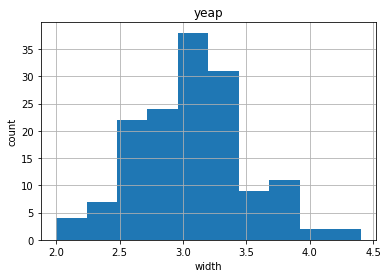

In [18]:

df.hist()
plt.title("yeap")
plt.xlabel('width')
plt.ylabel('count')


Text(0, 0.5, 'count')

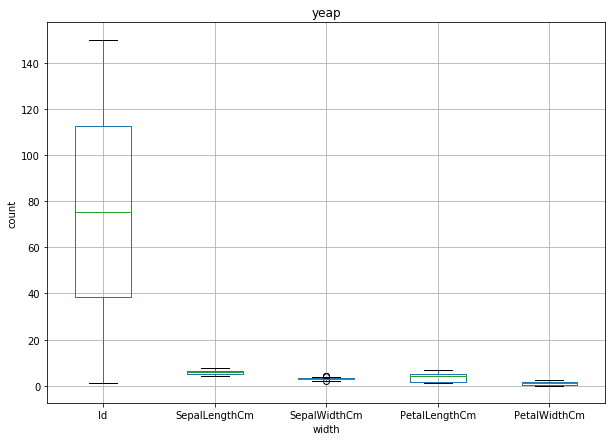

In [27]:
plt.figure(figsize = (10,7))
df.boxplot()
plt.title("yeap")
plt.xlabel('width')
plt.ylabel('count')


# Convert numerical variable to  categorical variab;e

In [28]:
sepal_length_ranges = ["[{0} - {1})".format(SepalLengthCm, SepalLengthCm + 1.0) for SepalLengthCm in range(4, 8, 1)]
sepal_length_ranges

['[4 - 5.0)', '[5 - 6.0)', '[6 - 7.0)', '[7 - 8.0)']

In [29]:
count_sepal_length_ranges = len(sepal_length_ranges)
count_sepal_length_ranges

4

In [30]:
df['SepalLengthCm_Range'] = pd.cut(x=df['SepalLengthCm'], bins=count_sepal_length_ranges, labels=sepal_length_ranges)

In [31]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthCm_Range
0,1,5.1,3.5,1.4,0.2,Iris-setosa,[4 - 5.0)
1,2,4.9,3.0,1.4,0.2,Iris-setosa,[4 - 5.0)
2,3,4.7,3.2,1.3,0.2,Iris-setosa,[4 - 5.0)
3,4,4.6,3.1,1.5,0.2,Iris-setosa,[4 - 5.0)
4,5,5.0,3.6,1.4,0.2,Iris-setosa,[4 - 5.0)


In [32]:
sepal_len_hist_df = df['SepalLengthCm_Range'].value_counts()
sepal_len_hist_df

[5 - 6.0)    50
[4 - 5.0)    45
[6 - 7.0)    43
[7 - 8.0)    12
Name: SepalLengthCm_Range, dtype: int64

In [33]:
df_range_hist = pd.DataFrame(sepal_len_hist_df).reset_index()
df_range_hist.columns = ['SepalLengthCm_Range', 'Count']
df_range_hist

,SepalLengthCm_Range,Count
0,[5 - 6.0),50
1,[4 - 5.0),45
2,[6 - 7.0),43
3,[7 - 8.0),12


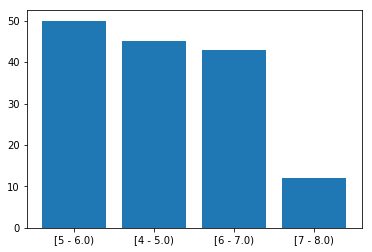

In [34]:

plt.bar(df_range_hist["SepalLengthCm_Range"], df_range_hist["Count"])
plt.show()

# # Bi-Variate Analysis

# ## Numerical-Numerical Variable Analysis

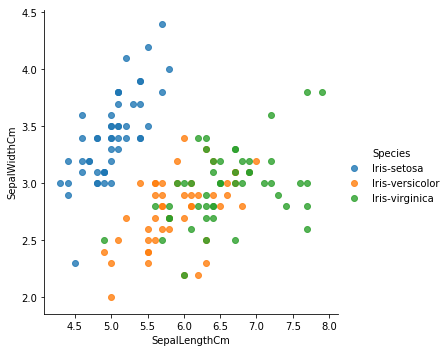

In [36]:
#Scatter Plot
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', fit_reg=False, data=df)


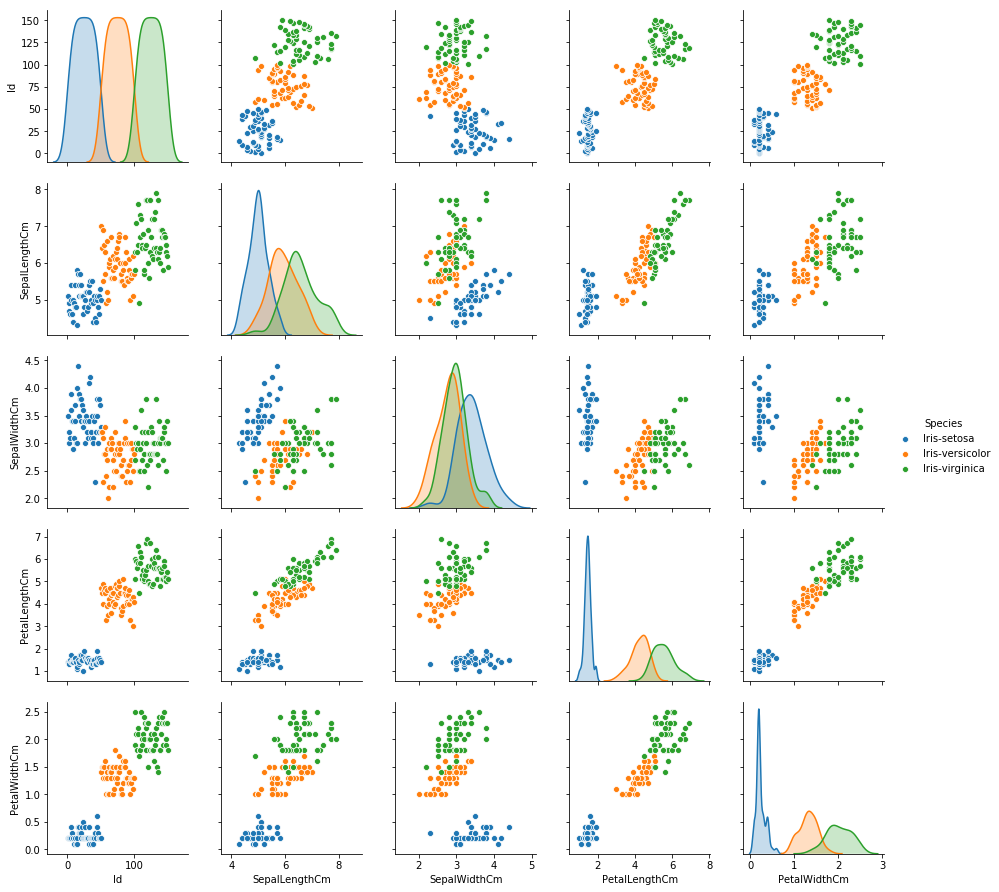

In [37]:
#Scatter Plot Matrix
sns.pairplot(hue='Species', data=df)

In [38]:

#Correlation 
df.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# ## Categorical-Categorical Variable Analysis

In [44]:
df2 = pd.read_csv('Train.csv')
df2.head()
#df_plot = df.groupby(['Color', 'Species']).size().reset_index().pivot(columns='Color', index='Species', values=0)
#df_plot.plot(x=df_plot.index, kind='bar', stacked=True)

#pd.crosstab(df.Species,df.Color)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [45]:
pd.crosstab(df2.Item_Type,df2.Outlet_Size)

Outlet_Size,High,Medium,Small
Item_Type,,,
Baking Goods,73,203,187
Breads,25,83,71
Breakfast,13,36,30
Canned,65,217,189
Dairy,80,218,198
Frozen Foods,92,274,249
Fruits and Vegetables,142,413,328
Hard Drinks,23,75,50
Health and Hygiene,61,170,136


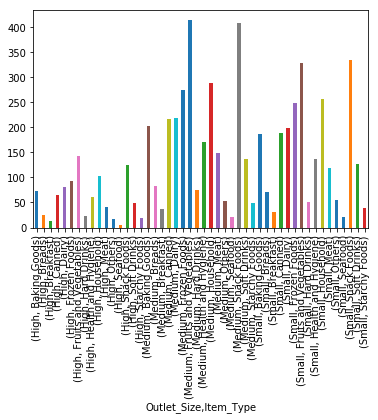

In [51]:
df_plot = df2.groupby(['Outlet_Size', 'Item_Type']).size()
df_plot.plot(x=df_plot.index, kind='bar', stacked=True)


In [52]:
df_mean = df.groupby(['Species']).mean().reset_index()
df_mean


,Species,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,Iris-setosa,25.5,5.006,3.418,1.464,0.244
1,Iris-versicolor,75.5,5.936,2.770,4.260,1.326
2,Iris-virginica,125.5,6.588,2.974,5.552,2.026


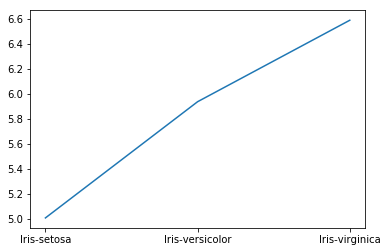

In [53]:

plt.plot(df_mean['Species'], df_mean['SepalLengthCm'])

In [54]:
df_mean = df.groupby(['Species']).mean().reset_index()
df_var = df.groupby(['Species']).var().reset_index()
z = (5.006 - 5.936)/np.sqrt(np.square(0.1242)/50 + np.square(0.266433)/50)
z


-22.37074570814338

# ## Numerical-Categorical Variable Analysis

In [55]:
df_mean = df.groupby(['Species']).mean().reset_index().drop(['Id'], axis=1).add_prefix('mean_')
df_var = df.groupby(['Species']).var().reset_index().drop(['Id','Species'], axis=1).add_prefix('var_')
df_count = df.groupby(['Species']).count().reset_index().drop(['Id', 'Species'], axis=1).add_prefix('count_')
pd.concat([df_mean, df_var, df_count], axis=1)


,mean_Species,mean_SepalLengthCm,mean_SepalWidthCm,mean_PetalLengthCm,mean_PetalWidthCm,var_SepalLengthCm,var_SepalWidthCm,var_PetalLengthCm,var_PetalWidthCm,count_SepalLengthCm,count_SepalWidthCm,count_PetalLengthCm,count_PetalWidthCm,count_SepalLengthCm_Range
0,Iris-setosa,5.006,3.418,1.464,0.244,0.124249,0.145180,0.030106,0.011494,50,50,50,50,50
1,Iris-versicolor,5.936,2.770,4.260,1.326,0.266433,0.098469,0.220816,0.039106,50,50,50,50,50
2,Iris-virginica,6.588,2.974,5.552,2.026,0.404343,0.104004,0.304588,0.075433,50,50,50,50,50


In [56]:
k=3
N = 50+50+50
Numerator = np.sum([np.square(5.006-5.843)/(k-1), np.square(5.936-5.843)/(k-1), np.square(6.588-5.843)/(k-1)])
Numerator

0.6321214999999999

In [57]:
Setosa = np.sum(np.square(df[df['Species'] == 'Iris-setosa'].SepalLengthCm - 5.006)/(N-k))
Versicolor = np.sum(np.square(df[df['Species'] == 'Iris-versicolor'].SepalLengthCm - 5.936)/(N-k))
Verginica = np.sum(np.square(df[df['Species'] == 'Iris-virginica'].SepalLengthCm - 6.588)/(N-k))
Denominator = Setosa+Versicolor+Verginica
Denominator

0.26500816326530613

In [58]:

F = Numerator/Denominator
F

2.3852906726015366

#Link to Calculate F-Statistics
http://onlinestatbook.com/2/calculators/F_dist.html